In [7]:
import sys
import os

# Get the absolute path to the project directory
project_dir = os.path.abspath("..")

# Append the project directory to sys.path
if project_dir not in sys.path:
    sys.path.append(project_dir)
    
from src.predictionModule.TreeTimeML import TreeTimeML

import pandas as pd
import numpy as np
import polars as pl
import datetime
import matplotlib.pyplot as plt
import logging
logging.basicConfig(
    level=logging.DEBUG,
    format='%(message)s'
)

In [ ]:
params = {
    "daysAfterPrediction": 7,
    'timesteps': 20,
    
    'target_option': 'last',

    "TreeTime_isFiltered": True,
    "TreeTime_RSIExt_q": 0.07143461165932076,
    "TreeTime_FourierRSME_q": 0.09374287501769159,

    "TreeTime_lstm_units": 16,
    "TreeTime_lstm_num_layers": 2,
    "TreeTime_lstm_dropout": 0.3075853360749299,
    "TreeTime_lstm_recurrent_dropout": 0.21305288719037974,
    "TreeTime_lstm_learning_rate": 0.0016890513728400147,
    "TreeTime_lstm_optimizer": "rmsprop",
    "TreeTime_lstm_bidirectional": True,
    "TreeTime_lstm_batch_size": 128,
    "TreeTime_lstm_epochs": 1,
    "TreeTime_lstm_l1": 0.5,
    "TreeTime_lstm_l2": 0.5,
    "TreeTime_inter_dropout": 0.5,
    "TreeTime_input_gaussian_noise": 0.1,
    
    'TreeTime_lgb_num_boost_round': 143,
    'TreeTime_lgb_lambda_l1': 0.7796235455765577,
    'TreeTime_lgb_lambda_l2': 0.5702920669930339,
    'TreeTime_lgb_feature_fraction': 0.10761430403277542,
    'TreeTime_lgb_num_leaves': 124,
    'TreeTime_lgb_max_depth': 16,
    'TreeTime_lgb_learning_rate': 0.004619047626804867,
    'TreeTime_lgb_min_data_in_leaf': 353,
    'TreeTime_lgb_min_gain_to_split': 0.17187409867167036,
    'TreeTime_lgb_path_smooth': 0.9574198886555025,
    'TreeTime_lgb_min_sum_hessian_in_leaf': 0.052046545928833905,
    
    'TreeTime_MatchFeatures_minWeight': 0.2167758022373982,
    'TreeTime_MatchFeatures_truncation': 1,
    
    'TreeTime_MatchFeatures_Pricediff': False,
    'TreeTime_MatchFeatures_FinData_quar': False,
    'TreeTime_MatchFeatures_FinData_metrics': False,
    'TreeTime_MatchFeatures_Fourier_RSME': False,
    'TreeTime_MatchFeatures_Fourier_Sign': False,
    'TreeTime_MatchFeatures_TA_trend': False,
    'TreeTime_MatchFeatures_FeatureGroup_VolGrLvl': False,
    'TreeTime_MatchFeatures_LSTM_Prediction': True,
    
    "TreeTime_top_highest": 10,
}

stock_group = "group_snp500_finanTo2011"

eval_date = datetime.date(year=2024, month=12, day=13)
start_train_date = datetime.date(year=2022, month=1, day=1)

treetimeML = TreeTimeML(
    train_start_date=start_train_date,
    test_date=eval_date,
    group=stock_group,
    params=params,
    gatherTestResults=True,
)

In [3]:
treetimeML.load_and_filter_sets(main_path = "../src/featureAlchemy/bin/")

In [5]:
assert np.all(treetimeML.train_Xtime>=0.0) & np.all(treetimeML.train_Xtime<=1.0), "Train X Time values out of range [0, 1]"
print(t1 := treetimeML.test_ytime)
print(t2 := treetimeML.test_ytree)
print(m3 := treetimeML.meta_pl_test)

[0.5037484  0.48012602 0.49538356 0.5002157  0.44622412 0.48927477
 0.4659939  0.48204628 0.52267826 0.4864809  0.47853708 0.5138903
 0.48390484 0.49486807 0.4871877  0.4806834  0.4809952  0.46683902
 0.47806907 0.50134635 0.47812834 0.48769018 0.49914706 0.47910362
 0.4948166  0.44943416 0.46425167 0.49520496 0.49387127 0.46582374
 0.4942212  0.48252445 0.48459065 0.49751887 0.49711916 0.45423117
 0.4658401  0.48043483 0.47489542 0.5059938  0.47037482 0.5047813
 0.4646608  0.47547686 0.47675943 0.4817506  0.46873248 0.4773707
 0.46621093 0.4572728  0.4864256  0.4897754  0.48384583 0.47620636
 0.49050453 0.48596498 0.48308283 0.47559917 0.47343847 0.4879607
 0.47848165 0.48552278 0.49430934 0.47207448 0.50393695 0.4945662
 0.4722859  0.4768376  0.49121085 0.4712043  0.4662123  0.48436764
 0.5001596  0.49465668 0.475509   0.4654444  0.48190922 0.45201418
 0.48102424 0.4892456  0.48168483 0.46669352 0.4787612  0.47832623
 0.48521274 0.48084697 0.5021678  0.46836922 0.47209468 0.4973797
 

In [6]:
treetimeML.analyze()

Number of time features: 60
Overall Training Label Distribution:
  Label False: Count = 65824, Frequency = 0.91
  Label True: Count = 6140, Frequency = 0.09

c:\Users\kimer\Desktop\RandomOdyssey\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
LSTM completed in 0:07:44.878854.


4498/4498 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


LGBM completed in 0:08:07.633540.
Predicted Training Label Distribution:
  Label False: Count = 71964, Frequency = 1.00

Testing Masked Classification Metrics:
c:\Users\kimer\Desktop\RandomOdyssey\.venv\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(

  Overall Accuracy: 1.00

  Metrics per Class:
    Class True:
      TPR: 1.00, FPR: 0.00, TNR: 0.00, FNR: 0.00

Accuracy of top 10 to be over 5%: 0.00%
Mean value of top 10: -0.054023586213588715
Min value of top 10: -0.10796935856342316
Max value of top 10: -0.01758011430501938
DataFrame:
shape: (10, 8)
+-----------+------------+--------+-----------+-------------+------------+-----------+-------------+
| row_index | date       | ticker | Close     | target_date | price_date | price     | target_clos |
| ---       | ---        | ---    | ---    

(np.float32(-0.054023586), np.float32(-0.035676003))

[ 9 20 21 32 34 35 36 38 47 49 50 51 52 54 55 56 58 60 61 62 64 65 67 88]
1.0383887
0.052151173
24
0.9829
0.9954362
1.0062027
1.0262026


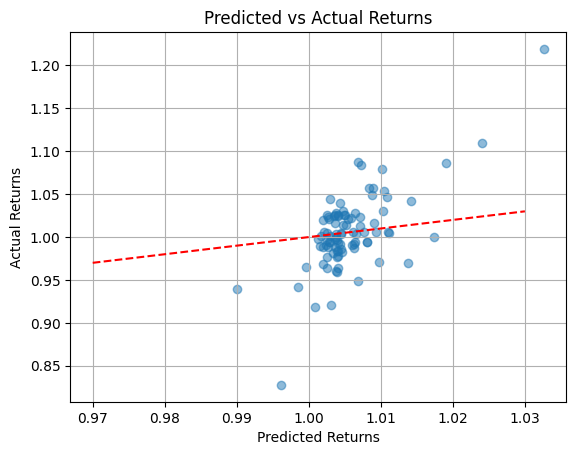

In [27]:
res_ret = [np.float32(0.98418933), np.float32(1.0304543), np.float32(0.99228525), np.float32(1.0037215), np.float32(1.0212071), np.float32(0.964355), np.float32(1.0204871), np.float32(0.99372184), np.float32(1.0261537), np.float32(1.0575693), np.float32(1.0254962), np.float32(0.98552084), np.float32(0.99633837), np.float32(0.9878546), np.float32(1.0031679), np.float32(1.0030512), np.float32(1.0251026), np.float32(0.9969162), np.float32(0.9948347), np.float32(0.998129), np.float32(1.0299238), np.float32(1.079582), np.float32(0.9883913), np.float32(1.0260684), np.float32(1.0048655), np.float32(1.0013252), np.float32(1.0005195), np.float32(1.0255033), np.float32(1.0160545), np.float32(1.0278337), np.float32(1.0046791), np.float32(0.993781), np.float32(1.0059433), np.float32(1.0053523), np.float32(1.0840967), np.float32(1.0468454), np.float32(0.99411345), np.float32(0.99360025), np.float32(1.0572858), np.float32(0.98748606), np.float32(0.983709), np.float32(0.96899146), np.float32(0.9591711), np.float32(0.9902433), np.float32(0.918581), np.float32(0.9206902), np.float32(0.9645079), np.float32(1.005797), np.float32(0.9826978), np.float32(1.0420368), np.float32(0.97146213), np.float32(1.0541624), np.float32(1.0495878), np.float32(0.9913024), np.float32(1.0160599), np.float32(0.9702222), np.float32(1.0051361), np.float32(0.94901735), np.float32(1.01233), np.float32(1.0871668), np.float32(1.0063756), np.float32(0.994321), np.float32(1.0232346), np.float32(1.0135266), np.float32(0.9999687), np.float32(1.1091309), np.float32(0.9776052), np.float32(1.2192769), np.float32(0.82769), np.float32(0.9418644), np.float32(1.0395235), np.float32(0.99152106), np.float32(0.9815545), np.float32(1.0138837), np.float32(1.0276449), np.float32(1.0250801), np.float32(1.0217142), np.float32(0.9764859), np.float32(0.96100616), np.float32(1.0443192), np.float32(1.0054895), np.float32(0.96471274), np.float32(0.9888261), np.float32(1.0262148), np.float32(1.0006685), np.float32(1.0233312), np.float32(0.97620755), np.float32(0.98949623), np.float32(1.0868666), np.float32(0.93906724), np.float32(0.9975935), np.float32(1.0202413)]
res_pred= [np.float64(1.0039138944239228), np.float64(1.0046947298473865), np.float64(1.0062506351292897), np.float64(1.0065055247755217), np.float64(1.005417685905612), np.float64(1.0040080163988891), np.float64(1.0027835191700762), np.float64(1.002904642628776), np.float64(1.0024671888306096), np.float64(1.0089600989110679), np.float64(1.0040405509640844), np.float64(1.00443548516886), np.float64(1.0039618312530283), np.float64(1.0036641033867184), np.float64(1.0044956187766232), np.float64(1.0038240225444883), np.float64(1.003512719779176), np.float64(1.0025719489506932), np.float64(1.0027741774748011), np.float64(1.003658120574522), np.float64(1.0102409454888237), np.float64(1.0101859026852453), np.float64(1.0026271880040536), np.float64(1.0048774162954206), np.float64(1.0025938803350356), np.float64(1.0030025569967997), np.float64(1.0038031791723014), np.float64(1.0050641671992633), np.float64(1.0036879332861326), np.float64(1.0063717111820207), np.float64(1.0044662281087429), np.float64(1.0064316832690512), np.float64(1.0093493280512633), np.float64(1.0061359525094042), np.float64(1.0072191166127002), np.float64(1.0107915479424059), np.float64(1.0080159269066251), np.float64(1.0040332795801568), np.float64(1.0083249569950838), np.float64(1.0062503655902821), np.float64(1.0040067137436615), np.float64(1.0019613953886257), np.float64(1.0039718548014582), np.float64(1.0024446358408377), np.float64(1.0009134209235526), np.float64(1.0030431281024776), np.float64(1.0025093732590498), np.float64(1.0076756056524467), np.float64(1.0046569178043119), np.float64(1.0142455899131735), np.float64(1.00978169593983), np.float64(1.0104848586334927), np.float64(1.008774164392532), np.float64(1.0060199146172661), np.float64(1.0091017542561898), np.float64(1.0138170262599493), np.float64(1.011168351588465), np.float64(1.0068565584669336), np.float64(1.0071743845197891), np.float64(1.006822716796426), np.float64(1.0110340710752204), np.float64(1.0081255411502563), np.float64(1.0071580253917372), np.float64(1.0051757287026477), np.float64(1.017335781672919), np.float64(1.0240417421239538), np.float64(1.0040774039128522), np.float64(1.032597597405356), np.float64(0.9961454486482383), np.float64(0.9984759787594099), np.float64(1.004352027917018), np.float64(1.0044007233307308), np.float64(1.003340166232919), np.float64(1.004704566085361), np.float64(1.0038200695521942), np.float64(1.0041205278477419), np.float64(1.0058252200150013), np.float64(1.0039283661069764), np.float64(1.0037650221358965), np.float64(1.0030076052322907), np.float64(1.0021160378193943), np.float64(0.999593722909293), np.float64(1.0020001449985183), np.float64(1.0036835579995047), np.float64(1.0016389618614272), np.float64(1.002706925944572), np.float64(1.0025547259338672), np.float64(1.0014959565909745), np.float64(1.0190022105071304), np.float64(0.990014889459119), np.float64(1.0012469860411939), np.float64(1.0019976622084505)]

ret = np.array(res_ret, dtype=np.float32)
pred = np.array(res_pred, dtype=np.float64)
idces = np.where(np.array(pred) > 1.007)[0]
print(idces)
ret_masked = ret[np.array(pred) > 1.007]
print(np.mean(ret_masked))
print(np.std(ret_masked))   
print(len(ret_masked))

plt.scatter(pred, ret, alpha=0.5)
plt.xlabel("Predicted Returns")
plt.ylabel("Actual Returns")
plt.title("Predicted vs Actual Returns")
plt.plot([0.97, 1.03], [0.97, 1.03], 'r--')  # Diagonal line for reference
plt.grid(True)
plt.show

print(np.quantile(ret, 0.2))
print(np.quantile(ret, 0.4))
print(np.quantile(ret, 0.6))
print(np.quantile(ret, 0.8))